## Dataviz

### Importing libraries

In [5]:
import cv2
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.ndimage import zoom

### Import data

In [54]:
# Load the NIfTI file t1w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore.1.60.nii'
img = nib.load(nifti_file)
data1 = img.get_fdata()
# Load the NIfTI file t2w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T2w_restore.1.60.nii'
img = nib.load(nifti_file)
data2 = img.get_fdata()

In [56]:
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore_downscaled_to_1.5T.nii'
img = nib.load(nifti_file)
data1 = img.get_fdata()
slice_index = data1.shape[2] // 2  # Taking the middle slice along the z-axis
slice = data1[:, :, slice_index]
data1.shape

(60, 73, 60)

In [55]:
# Load the NIfTI file t1w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore.1.60.nii'
img = nib.load(nifti_file)
data1 = img.get_fdata()

# Print original shape
original_shape = data1.shape
print(f"Original shape: {original_shape}")

# Assuming you want to downscale to a resolution typical for 1.5T MRI, let's assume 2mm isotropic voxels.
current_voxel_size = 1.6  # mm
target_voxel_size = 3.0   # mm

# Compute the scaling factor for each dimension
scaling_factor = current_voxel_size / target_voxel_size

# Downscale the data using the zoom function
downscaled_data = zoom(data1, (scaling_factor, scaling_factor, scaling_factor))

# Print downscaled shape
downscaled_shape = downscaled_data.shape
print(f"Downscaled shape: {downscaled_shape}")

# Create a new NIfTI image with the downscaled data
downscaled_img = nib.Nifti1Image(downscaled_data, affine=img.affine)

# Save the downscaled image to a new file
downscaled_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore_downscaled_to_1.5T.nii'
nib.save(downscaled_img, downscaled_file)

print(f"Downscaled image saved to: {downscaled_file}")

Original shape: (113, 136, 113)
Downscaled shape: (60, 73, 60)
Downscaled image saved to: ../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore_downscaled_to_1.5T.nii


### Statistics

In [57]:
def stats(data):
    slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
    slice = data[:, :, slice_index]

    # Calculate statistics
    min_val = np.min(slice)
    max_val = np.max(slice)
    mean_val = np.mean(slice)
    median_val = np.median(slice)
    std_val = np.std(slice)
    var_val = np.var(slice)

    # Print the statistics
    print(f"Statistics for the middle slice:")
    print(f"Minimum value: {min_val}")
    print(f"Maximum value: {max_val}")
    print(f"Mean value: {mean_val}")
    print(f"Median value: {median_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Variance: {var_val}")

def plot_voxel_distribution(data):
    num_slices = data.shape[2]
    
    # Set up the plot
    fig, axes = plt.subplots(num_slices // 5 + 1, 5, figsize=(20, num_slices // 5 * 4))
    axes = axes.flatten()
    
    for i in range(num_slices):
        slice_data = data[:, :, i].flatten()
        axes[i].hist(slice_data, bins=50, color='blue', alpha=0.7)
        axes[i].set_title(f'Slice {i + 1}')
        axes[i].set_xlabel('Voxel Intensity')
        axes[i].set_ylabel('Frequency')
        
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    plt.title('Distribution of Voxel Values in Each Slice')
    path = '/Users/hendrik/MRI-Super-Resolution/data analysis/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610'
    with PdfPages(path + '/Distribution of Voxel Values in Each Slice.pdf') as pdf:
        pdf.savefig(fig)
        plt.close()
    return fig

def plot_middle_slice_distribution(data):
    # Calculate the index of the middle slice
    middle_index = data.shape[2] // 2
    
    # Extract the middle slice
    middle_slice = data[:, :, middle_index]
    
    # Flatten the middle slice to a 1D array
    flattened_slice = middle_slice.flatten()

    fig = plt.figure(figsize=(8, 6))
    # Plot the histogram of voxel intensities
    plt.hist(flattened_slice, bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of Voxel Values in the Middle Slice (Slice {middle_index + 1})')
    plt.xlabel('Voxel Intensity')
    plt.ylabel('Frequency')
    plt.show()
    path = '/Users/hendrik/MRI-Super-Resolution/data analysis/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610'
    with PdfPages(path + '/Distribution of Voxel Values in the Middle Slice.pdf') as pdf:
        pdf.savefig(fig)
    return fig

def clip_intensity(data, min_percentile=1, max_percentile=99):
    # Calculate the global min and max intensity values for clipping
    min_val = np.percentile(data, min_percentile)
    max_val = np.percentile(data, max_percentile)
    # Apply clipping to the entire dataset
    clipped_data = np.clip(data, min_val, max_val)
    return clipped_data

def z_score_normalize(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_normalized_data = (data - mean) / std_dev
    return z_normalized_data

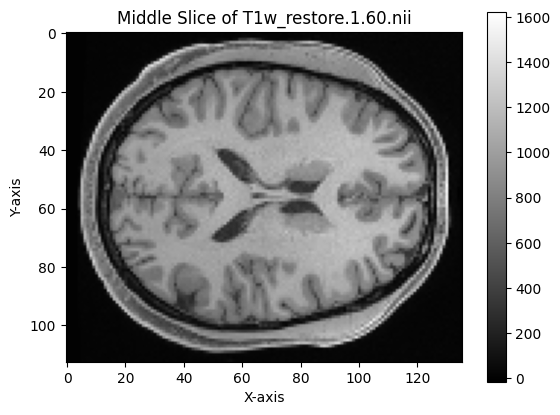

Statistics for the middle slice:
Minimum value: -15.990033149719238
Maximum value: 1622.39599609375
Mean value: 581.0829892894988
Median value: 711.0732421875
Standard Deviation: 429.2396248161251
Variance: 184246.65551228786


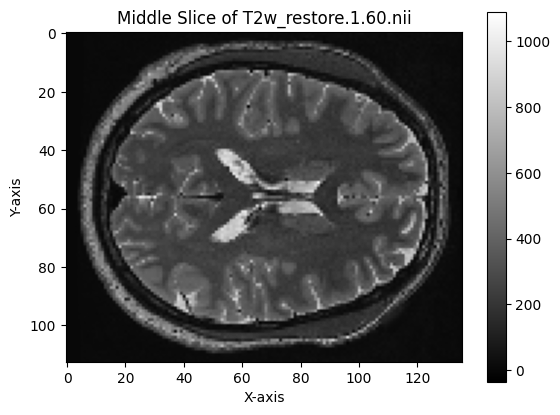

Statistics for the middle slice:
Minimum value: -35.626705169677734
Maximum value: 1089.327392578125
Mean value: 211.2916306139024
Median value: 210.97068786621094
Standard Deviation: 186.47900224813486
Variance: 34774.41827945989


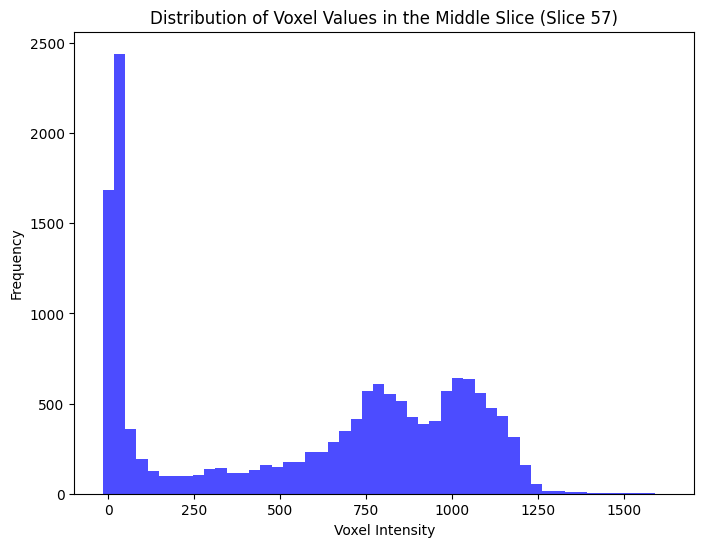

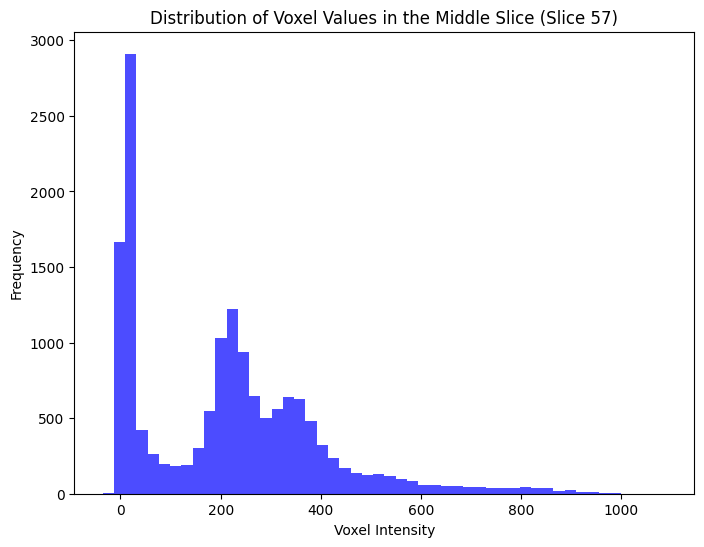

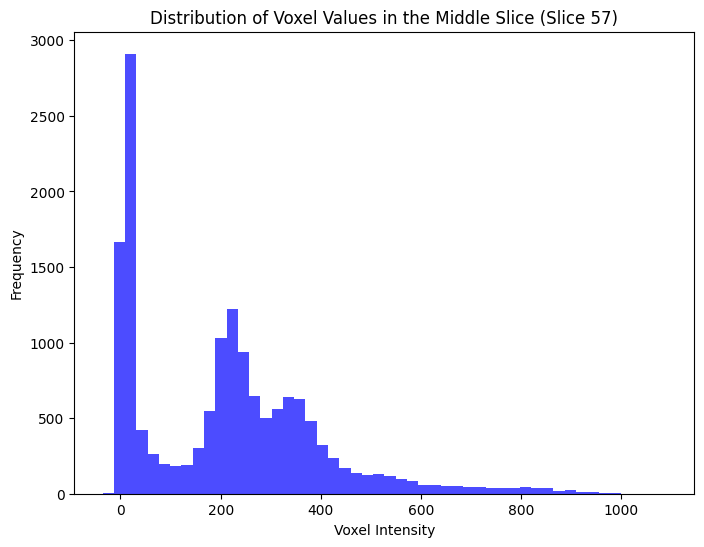

In [8]:
#RAW

# Load the NIfTI file t1w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore.1.60.nii'
img = nib.load(nifti_file)
data1 = img.get_fdata()

# Load the NIfTI file t2w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T2w_restore.1.60.nii'
img = nib.load(nifti_file)
data2 = img.get_fdata()

# Plotting a slice from the middle of the volume
data = data1
slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.colorbar()
plt.title('Middle Slice of T1w_restore.1.60.nii')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
stats(data)

# Plotting a slice from the middle of the volume
data = data2
slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.colorbar()
plt.title('Middle Slice of T2w_restore.1.60.nii')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
stats(data)

#Plot voxel distribution
# plot_voxel_distribution(data1)
plot_middle_slice_distribution(data1)

# plot_voxel_distribution(data2)
plot_middle_slice_distribution(data2)

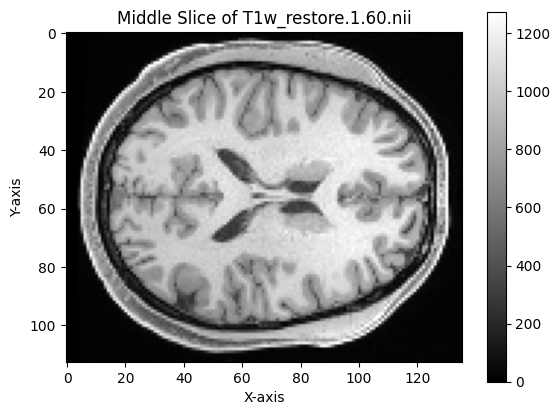

Statistics for the middle slice:
Minimum value: -2.6143533773392846e-06
Maximum value: 1273.0362573242178
Mean value: 580.674458879146
Median value: 711.0732421875
Standard Deviation: 428.4649075576103
Variance: 183582.17700835151


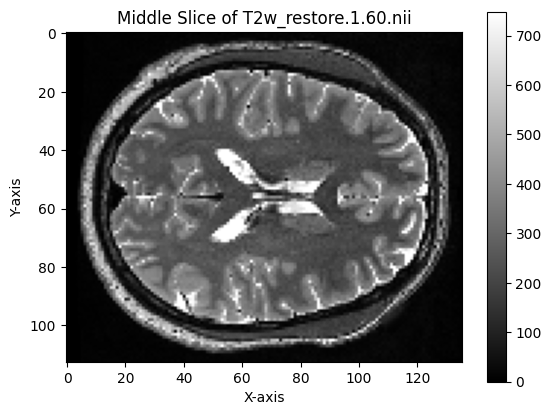

Statistics for the middle slice:
Minimum value: -0.00017414200759958309
Maximum value: 747.4761578369129
Mean value: 209.70360362771464
Median value: 210.97068786621094
Standard Deviation: 181.1773857051879
Variance: 32825.245090966426


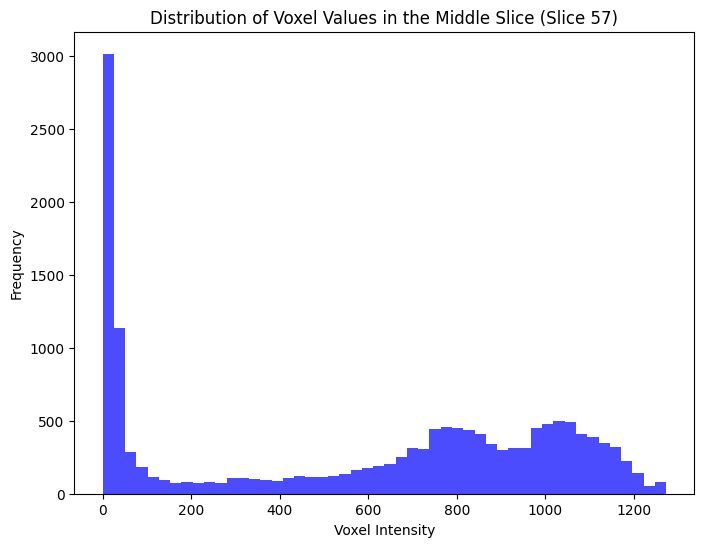

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hendrik/MRI-Super-Resolution/data analysis/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/Distribution of Voxel Values in the Middle Slice.pdf'

In [16]:
# CLIP INTENSITY

# Load the NIfTI file t1w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore.1.60.nii'
img = nib.load(nifti_file)
data1 = img.get_fdata()

# Load the NIfTI file t2w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T2w_restore.1.60.nii'
img = nib.load(nifti_file)
data2 = img.get_fdata()

#Clip intensity
data1 = clip_intensity(data1)
data2 = clip_intensity(data2)

# Plotting a slice from the middle of the volume
data = data1
slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.colorbar()
plt.title('Middle Slice of T1w_restore.1.60.nii')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
stats(data)

# Plotting a slice from the middle of the volume
data = data2
slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.colorbar()
plt.title('Middle Slice of T2w_restore.1.60.nii')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
stats(data)

#Plot voxel distribution
# plot_voxel_distribution(data1)
plot_middle_slice_distribution(data1)

# plot_voxel_distribution(data2)
plot_middle_slice_distribution(data2)

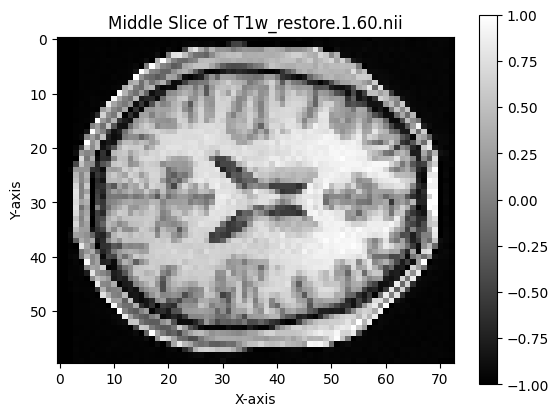

Statistics for the middle slice:
Minimum value: -1.0
Maximum value: 1.0
Mean value: -0.08463345019048191
Median value: 0.11961605743056436
Standard Deviation: 0.6926633923454645
Variance: 0.4797825750955269


In [59]:
# Z NORMALIZATION

# Load the NIfTI file t1w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T1w_restore_downscaled_to_1.5T.nii'
img = nib.load(nifti_file)
data1 = img.get_fdata()

# Load the NIfTI file t2w
nifti_file = '../data/HCP/Structural Preprocessed for 7T (1.6mm:59k mesh)/100610/MNINonLinear/T2w_restore_downscaled_to_1.5T.nii'
img = nib.load(nifti_file)
data2 = img.get_fdata()

#Clip intensity
data1 = clip_intensity(data1)
data2 = clip_intensity(data2)

#Z normalization
data1 = z_score_normalize(data1)
data2 = z_score_normalize(data2)

#MinMax to [-1,1]
def min_max_scale(data, new_min=-1, new_max=1):
    data_min = np.min(data)
    data_max = np.max(data)
    data_scaled = (data - data_min) / (data_max - data_min)  # Rescale to [0, 1]
    data_scaled = data_scaled * (new_max - new_min) + new_min  # Rescale to [new_min, new_max]
    return data_scaled
# Assuming data1 and data2 are numpy arrays containing the images
data1 = min_max_scale(data1)
data2 = min_max_scale(data2)

# Plotting a slice from the middle of the volume
data = data1
slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
plt.imshow(data[:, :, slice_index], cmap='gray')
plt.colorbar()
plt.title('Middle Slice of T1w_restore.1.60.nii')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
stats(data)

# Plotting a slice from the middle of the volume
# data = data2
# slice_index = data.shape[2] // 2  # Taking the middle slice along the z-axis
# plt.imshow(data[:, :, slice_index], cmap='gray')
# plt.colorbar()
# plt.title('Middle Slice of T2w_restore.1.60.nii')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.show()
# stats(data)

#Plot voxel distribution
# plot_voxel_distribution(data1)
# plot_middle_slice_distribution(data1)

# plot_voxel_distribution(data2)
# plot_middle_slice_distribution(data2)

#### Create video of the data

In [60]:
data = data1

In [61]:
# Desired frame size for the video
frame_height = 256
frame_width = 256

# Video writer initialization
video_filename = 'mri_slices_t2w_LR.avi'
fps = 10  # Frames per second

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_filename, fourcc, fps, (frame_width * 3, frame_height))

for i in range(max(data.shape)):
    # Axial slice (z-axis)
    if i < data.shape[2]:
        axial_slice = data[:, :, i]
        axial_normalized = cv2.normalize(axial_slice, None, 0, 255, cv2.NORM_MINMAX)
        axial_colored = cv2.cvtColor(np.uint8(axial_normalized), cv2.COLOR_GRAY2BGR)
        axial_resized = cv2.resize(axial_colored, (frame_width, frame_height))
    else:
        axial_resized = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

    # Coronal slice (y-axis)
    if i < data.shape[0]:
        coronal_slice = data[i, :, :]
        coronal_normalized = cv2.normalize(coronal_slice, None, 0, 255, cv2.NORM_MINMAX)
        coronal_colored = cv2.cvtColor(np.uint8(coronal_normalized), cv2.COLOR_GRAY2BGR)
        coronal_resized = cv2.resize(coronal_colored, (frame_width, frame_height))
    else:
        coronal_resized = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

    # Sagittal slice (x-axis)
    if i < data.shape[1]:
        sagittal_slice = data[:, i, :]
        sagittal_normalized = cv2.normalize(sagittal_slice, None, 0, 255, cv2.NORM_MINMAX)
        sagittal_colored = cv2.cvtColor(np.uint8(sagittal_normalized), cv2.COLOR_GRAY2BGR)
        sagittal_resized = cv2.resize(sagittal_colored, (frame_width, frame_height))
    else:
        sagittal_resized = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

    # Combine slices side by side
    combined_frame = np.hstack((axial_resized, coronal_resized, sagittal_resized))
    out.write(combined_frame)

# Release the video writer
out.release()

print(f'Video saved as {video_filename}')

Video saved as mri_slices_t2w_LR.avi
